# U.S. Medical Insurance Costs

In [81]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [82]:
# load data into dataframe

insurance_data_df = pd.read_csv('insurance.csv')
print(f'Table contents:\n'
      f'{insurance_data_df.head(5)}')
print(f'Basic statistics:\n'
      f'{insurance_data_df.describe()}')

Table contents:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Basic statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


With these basic statistics we can say:
* The average age of patients in this Dataset is 39 Years with Standard Deviation of 14 Years -> most Patients are between 25 and 53 years old.
* The average patient has a BMI around 30 and around 25% of Patients have a BMI > 35
* We see huge differences for mean value and median for charges, which indicates which suggests the distribution of charges is skewed to the Left -> a small portion of treatments amount to a majority of overall costs.

### Feature Analysis Smoker

In [83]:
#convert column smoker into int value
insurance_data_df['smoker'] = insurance_data_df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [84]:
print(f'statistics for smokers:\n'
      f'{insurance_data_df[insurance_data_df["smoker"] == 1].describe()}')
print(f'statistics for non-smokers:\n'
      f'{insurance_data_df[insurance_data_df["smoker"] == 0].describe()}')

statistics for smokers:
              age         bmi    children  smoker       charges
count  274.000000  274.000000  274.000000   274.0    274.000000
mean    38.514599   30.708449    1.113139     1.0  32050.231832
std     13.923186    6.318644    1.157066     0.0  11541.547176
min     18.000000   17.195000    0.000000     1.0  12829.455100
25%     27.000000   26.083750    0.000000     1.0  20826.244213
50%     38.000000   30.447500    1.000000     1.0  34456.348450
75%     49.000000   35.200000    2.000000     1.0  41019.207275
max     64.000000   52.580000    5.000000     1.0  63770.428010
statistics for non-smokers:
               age          bmi     children  smoker       charges
count  1064.000000  1064.000000  1064.000000  1064.0   1064.000000
mean     39.385338    30.651795     1.090226     0.0   8434.268298
std      14.083410     6.043111     1.218136     0.0   5993.781819
min      18.000000    15.960000     0.000000     0.0   1121.873900
25%      26.750000    26.315000     0

In [85]:
charge_sum_smoker = insurance_data_df[insurance_data_df["smoker"] == 1]["charges"].sum()
charge_sum_non_smoker = insurance_data_df[insurance_data_df["smoker"] == 0]["charges"].sum()
total_charges = insurance_data_df["charges"].sum()
print(f'Total charges: {total_charges}')
print(f'Total charges for smokers: {charge_sum_smoker} ({round(charge_sum_smoker/total_charges, 2) * 100}% of total charges))')
print(f'Total charges for non-smokers: {charge_sum_non_smoker} ({round(charge_sum_non_smoker/total_charges, 2 ) * 100}% of total charges))')

Total charges: 17755824.990759
Total charges for smokers: 8781763.521839999 (49.0% of total charges))
Total charges for non-smokers: 8974061.468919002 (51.0% of total charges))


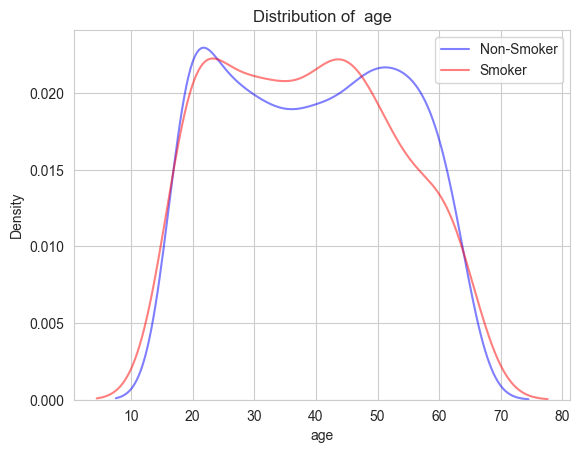

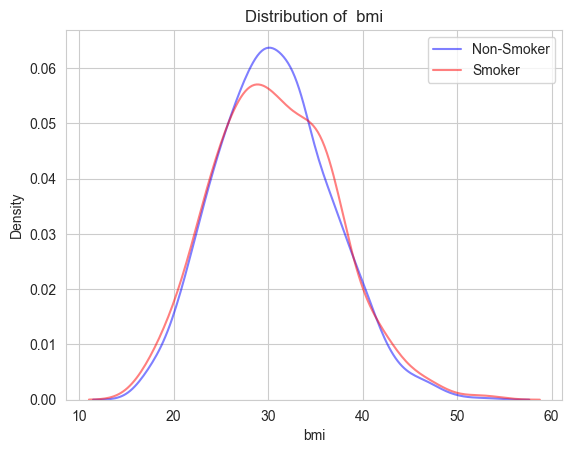

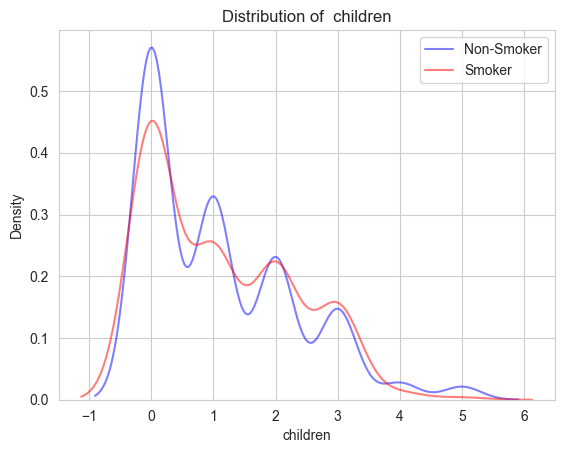

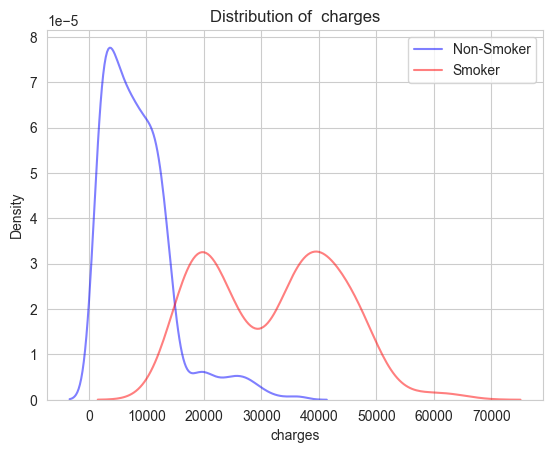

In [86]:
non_smoker_data = insurance_data_df[insurance_data_df["smoker"] == 0]
smoker_data = insurance_data_df[insurance_data_df["smoker"] == 1]

# Loop through each column in non_smoker_data
for value in non_smoker_data.columns:
    # Check if the column is not 'smoker' and is numeric
    if value != 'smoker' and (non_smoker_data[value].dtype == 'float64' or non_smoker_data[value].dtype == 'int64'):
        plt.figure()
        # Plot dist with the specified column
        sns.kdeplot(non_smoker_data[value], color='blue', alpha=0.5)
        sns.kdeplot(smoker_data[value], color='red', alpha=0.5)
        plt.title(f'Distribution of  {value}')
        plt.legend({'Non-Smoker':0, 'Smoker':1})
        plt.show()

With these basic statistics and visualizations, we can conclude:
1. 20.4% of the patients are smokers. These patients account for 8.781.763 usd. in charges, accounting for 49% of total charges.
2. 79.6% of the patients are non-smokers. These patients account for 8.974.061 usd. in charges, accounting for 51% of total charges.
3. Patients who smoke are, on average, slightly younger than non-smokers.
4. Smokers tend to have a slightly higher BMI than non-smokers.
